# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2021/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday November the 2nd, 2021 at 23:59. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

### Overview

This year's Assignment 2 is all about analyzing the network of The Legend of Zelda: Breath of the Wild.

Note that this time I'm doing the exercises slightly differently in order to clean things up a bit. The issue is that the weekly lectures/exercises include quite a few instructions and intermediate results that are not quite something you guys can meaningfully answer. 

Therefore, in the assignment below, I have tried to reformulate the questions from the weekly exercises into something that is (hopefully) easier to answer. *Then I also note which lectures each question comes from*; that way, you can easily go back and find additional tips & tricks on how to solve things 😇


----

# Part 0: Building the network 

To create our network, we downloaded the Zelda Wiki pages for all characters in BotW (during Week 4) and linked them via the hyperlinks connecting pages to each other. To achieve this goal we have used regular expressions!

> * Explain the strategy you have used to extract the hyperlinks from the Wiki-pages, assuming that you have already collected the pages with the Zelda API.
> * Show the regular expression(s) you have built and explain in details how it works.

1. The Wiki-pages was downloaded by requesting the pages for Characters, Enemies and Bosses in Zelda. The content of those pages were extracted from the response. Regular expression was then used to extract hyperlinks from the Wiki-page content. A bit of post processing was done, to filter out the matches that did not contain "link", meaning they were linking to a character page. (See more below)
        match = re.findall(r"{{Term\|BotW\|.*?}}", text)
        match = [name for name in match if "link" in name]

    Next step is to extract the character name from the strings, for that purpose the following post processing was done on a dataframe column containing all the strings.
        df["name"] = df.name.str.split("|")\
                            .str[2]\
                            .str.replace(" ", "_")
What is done here is splitting the string on "|" and extracting the value at 2 and then replacing any spaces with underscore, like so:
        "{{Term|BotW|Ritaag Zumo|link}}"
        ["{{Term", "BotW", "Ritaag Zumo", "link}}"]
        "Ritaag Zumo"
        "Ritaag_Zumo"

    From here the individual character pages were requested and the Wiki-page content extracted from the responses. In a niche case the page was redirecting to a different page, in this case the page redirected to was requested instead by extracting the correct character name from the page content with regular expression. Minor post processing was done to clean up the output. (See more below)
        redirect = re.search(r"\[\[.*?\]\]", NPCstringdict[name])\
                        .group()\
                        .replace("[", "")\
                        .replace("]", "")\
                        .replace(" ", "_")

    Once the character pages were collected extracting race, gender and links to other characters was done with regular expression. The post processing for the race involves checking which group the match is in and also extracting just the race name if a link is appended. For the links to other character the post processing involves replacing " " with "_" and again extracting just the name. (See more below)
        pattern_race = "(race=.*?)(\{\{(?:Term|Plural)\|BotW\|(.*?)\}\}|\[\[(.*?)(?:(?:\||\#).*?)?\]\]).*?\\n"
        pattern_gender = "(gender=.*?)(Male|Female).*?\\n"
        
        pattern_characters1 = "\[\[(.*?)(?:(?:\||\#).*?)?\]\]"
        pattern_characters2 = "\{\{(?:Term|Plural)\|BotW\|(.*?)\}\}"
2. Regular Expressions

    **Some symbols has a "\\" (escape character) in front of it, that is to ensure matching the symbol and not the regular expression function of the symbol. This will not be mentioned in those cases.**

    **To extract the hyperlinks from the Characters, Enemies and Bosses Wiki-page content this regular expression was used:**

        "{{Term\|BotW\|.*?}}"
    
    This RE works as follows:
    - The string must start with exactly "{{Term|BotW|"
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    - The string must end with exactly "}}".
    
  This RE matches with any string of the type "{{Term|BotW|ANY TEXT HERE}}".
  
    **To correct the redirecting character the following RE was used:**
  
        "\[\[.*?\]\]"
    This RE works as follows:
    - The string must start with exactly "\[\["
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    - The string must end with exactly "\]\]"
    
   This RE matches any string of type "\[\[ANY TEXT HERE\]\]".
    
   **To find the race of a character the following RE was used:**
       "(race=.*?)(\{\{(?:Term|Plural)\|BotW\|(.*?)\}\}|\[\[(.*?)(?:(?:\||\#).*?)?\]\]).*?\\n"
    - The string must start with exactly "race=".
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    
   Match Version A
    - The string must continue "\{\{".
    - (?:...) means to match the next segment enclosed.
    - The string must continue EITHER "Term" OR "Plural.
    - The string must continue "|BotW|".
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    - The string must continue "\}\}".
   
   Match Version B
    - The string must continue "\[\[".
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    - (?:...) means to match the next segment enclosed.
    - The string must continue EITHER "\|" OR "\#".
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    - The previous segment can be there zero or one times, in this case the 4 steps above.
    - The string must continue "\]\]".
    
   Universal Ending
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    - The string must end with exactly "\\n".
   
   This RE matches any string of type 
   
   "race={{Term(OR)Plural|BotW|ANY TEXT HERE}}\\n"
   
   or
   
   "race=\[\[ANY TEXT HERE(POSSIBLY)\|(OR)\#ANY TEXT HERE\]\]ANY TEXT HERE\\n".
   
   **To find the gender of a character the following RE was used:**
   
       "(gender=.*?)(Male|Female).*?\\n"
    
    - String must start with exactly "gender=".
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character. 
    - String must continue EITHER "Male" OR "Female".
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    - String must end with exactly "\\n"
    
   This RE matches any string of type "gender=ANY TEXT HERE\[\[Male(OR)Female\]\]ANY TEXT HERE\\n".
   
   **To find some characters the following RE was used:**
   
       "\[\[(.*?)(?:(?:\||\#).*?)?\]\]"
       
    - String must start with exactly "\[\["
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    - (?:...) means to match the next segment enclosed.
    - The string must continue EITHER "\|" OR "\#".
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    - The previous segment can be there zero or one times, in this case the 4 steps above.
    - String must end with exactly "\]\]".
   
   This RE matches any string of type "\[\[ANY TEXT HERE(POSSIBLY)\|(OR)\#ANY TEXT HERE\]\]".
   
   **To find the remaining character the following RE was used:**
   
       "\{\{(?:Term|Plural)\|BotW\|(.*?)\}\}"
    
    - The string must start with exactly "\{\{"
    - (?:...) means to match the next segment enclosed.
    - The string must continue EITHER "Term" OR "Plural.
    - The string must continue "|BotW|".
    - "." matches any character except "\\n".
    - "*?" matches zero to unlimited amounts of the previous character.
    - String must end with exactly "\}\}".
   
   This RE matches any string of type "{{Term(OR)Plural|BotW|ANY TEXT HERE}}".
    
   
       
   
  
    
    

# Part 1: Network visualization and basic stats

Visualize the network (from lecture 5) and calculate stats (from lecture 4 and 5). For this exercise, we assume that you've already generated the BotW network and extracted the giant connected component. Use the GCC to report the results.

_Exercise 1a_: Stats (see lecture 4 and 5 for more hints)

> * What is the number of nodes in the network? 
> * What is the number of links?
> * Who is the top connected character in BotW? (Report results for the in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected allies (again in terms of in/out-degree)? 
> * Who are the top 5 most connected enemies -- bosses included -- (again in terms of in/out-degree)?
> * Plot the in- and out-degree distributions. 
>   * What do you observe? 
>   * Can you explain why the in-degree distribution is different from the out-degree distribution?
> * Find the exponent of the degree distribution (by using the `powerlaw` package) for the in- and out-degree distribution. What does it say about our network?
> * Compare the degree distribution of the undirected graph to a *random network* with the same number of nodes and probability of connection *p*. Comment your results.

_Exercise 1b_: Visualization (see lecture 5 for more hints)

> * Create a nice visualization of the total (undirected) network:
>   * Color nodes according to the role;
>   * Scale node-size according to degree;
>   * Get node positions based on the Force Atlas 2 algorithm;
>   * Whatever else you feel like that would make the visualization nicer.
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?

In [1]:
import networkx as nx
import heapq
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
GCC = nx.readwrite.gexf.read_gexf("GCC.gexf")

In [3]:
# 1a.1
print("What is the number of nodes in the network?", len(GCC.nodes))
# 1a.2
print("What is the number of links?", len(GCC.edges))

# 1a.3
def get_most_connected(deg_list, num):
    degree_list = [deg[1] for deg in deg_list]
    name_list = [deg[0] for deg in deg_list]
    max_list = heapq.nlargest(num, degree_list)
    top_index = [i for i, value in enumerate(degree_list) if value in max_list]
    top = [char for i, char in enumerate(name_list) if i in top_index]
    return top


top_in = get_most_connected(GCC.in_degree, 1) 
top_out = get_most_connected(GCC.out_degree, 1)  
print("Who is the top connected character in BotW? (In, Out)", top_in, top_out)
# 1a.4
ally_nodes = [node for (node, data) in GCC.nodes.data("role") if data == "Ally"]
enemy_nodes = [node for (node, data) in GCC.nodes.data("role") if data == "Enemy" or data == "Boss"]

top_in_ally = get_most_connected(GCC.in_degree(ally_nodes), 5)
top_out_ally = get_most_connected(GCC.out_degree(ally_nodes), 5)

top_in_enemy = get_most_connected(GCC.in_degree(enemy_nodes), 5)
top_out_enemy = get_most_connected(GCC.out_degree(enemy_nodes), 5)
print("Who are the top 5 most connected allies? (In, Out)\n", top_in_ally, "\n", top_out_ally)
# 1a.5
print("Who are the top 5 most connected enemies -- bosses included? (In, Out)\n", top_in_enemy, "\n", top_out_enemy)

What is the number of nodes in the network? 516
What is the number of links? 1559
Who is the top connected character in BotW? (In, Out) ['Link'] ['Traysi']
Who are the top 5 most connected allies? (In, Out)
 ['Link', 'Hylia', 'Princess_Zelda', 'Riju', 'Purah'] 
 ['Link', 'Banji', 'Daruk', 'Impa', 'Urbosa', 'Traysi']
Who are the top 5 most connected enemies -- bosses included? (In, Out)
 ['Bokoblin', 'Blue_Bokoblin', 'Calamity_Ganon', 'Lizalfos', 'Stalizalfos', 'Stone_Talus'] 
 ['Lynel', 'Lizalfos', 'Blue_Lizalfos', 'Silver_Lizalfos', 'Ice-Breath_Lizalfos', 'Stalizalfos', 'Moblin']


**Answer:**
- **What is the number of nodes in the network?** 516
- **What is the number of links?** 1559
- **Who is the top connected character in BotW?**
    
    For the in degree it is 'Link' and for the out degree it is 'Traysi'

- **Who are the top 5 most connected allies?**

    For the in degree it is:
    
        'Link', 'Hylia', 'Princess_Zelda', 'Riju', 'Purah'
    
    For the out degree it is: (some have the same amount):
    
        'Link', 'Banji', 'Daruk', 'Impa', 'Urbosa', 'Traysi'
    
- **Who are the top 5 most connected enemies (bosses included)?**

   For the in degree it is (some have the same amount):
    
       'Bokoblin', 'Blue_Bokoblin', 'Calamity_Ganon', 'Lizalfos', 'Stalizalfos', 'Stone_Talus'
    
    For the out degree it is (some have the same amount):
    
        'Lynel', 'Lizalfos', 'Blue_Lizalfos', 'Silver_Lizalfos', 'Ice-Breath_Lizalfos', 'Stalizalfos', 'Moblin'

c:\users\eg\miniconda3\envs\socialgraphs2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\eg\miniconda3\envs\socialgraphs2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


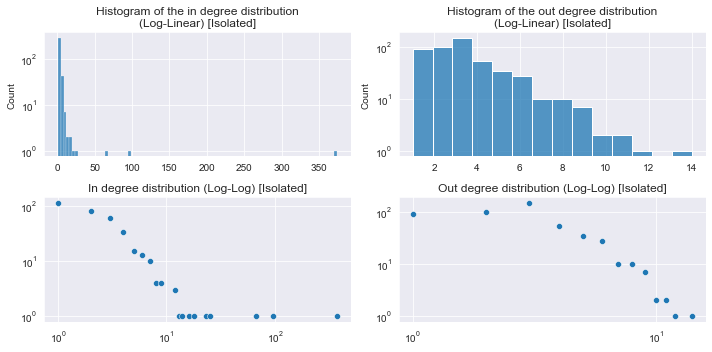

In [23]:
# 1a.6
sns.set_style("darkgrid")
in_deg = [deg[1] for deg in GCC.in_degree() if deg[1] != 0]
in_deg.sort()
out_deg = [deg[1] for deg in GCC.out_degree() if deg[1] != 0]
out_deg.sort()
unique_in_deg = [val for val in Counter(in_deg)]
count_in_deg = [Counter(in_deg)[key] for key in unique_in_deg]
unique_out_deg = [val for val in Counter(out_deg)]
count_out_deg = [Counter(out_deg)[key] for key in unique_out_deg]
fig, ax = plt.subplots(2,2, squeeze=False)
sns.histplot(in_deg, bins=100, ax=ax[0,0])
sns.scatterplot(unique_in_deg, count_in_deg, ax=ax[1,0])
sns.histplot(out_deg, bins=14, ax=ax[0,1])
sns.scatterplot(unique_out_deg, count_out_deg, ax=ax[1,1])
# plt.xscale("log")
# ax[0,0].set_xscale("log")

ax[0,0].set_yscale("log")
ax[1,0].set_xscale("log")
ax[1,0].set_yscale("log")
# ax[0,1].set_xscale("log")
ax[0,1].set_yscale("log")
ax[1,1].set_xscale("log")
ax[1,1].set_yscale("log")

ax[0,0].set_title("Histogram of the in degree distribution\n(Log-Linear) [Isolated]")
ax[1,0].set_title("In degree distribution (Log-Log) [Isolated]")
ax[0,1].set_title("Histogram of the out degree distribution\n(Log-Linear) [Isolated]")
ax[1,1].set_title("Out degree distribution (Log-Log) [Isolated]")

# ax[0,0].set_xticks(np.arange(0, len(in_deg), 30))
# ax[0,0].set_xticklabels(np.arange(0, len(in_deg), 30))
# ax[0,1].set_xticks(np.arange(0, len(out_deg), 50))
# ax[0,1].set_xticklabels(np.arange(0, len(out_deg), 50))

plt.tight_layout()
plt.show()

**Answer:**
- **Plot the in- and out-degree distributions (see above).**
    
    - **What do you observe?**
    
    It can be seen from the plot above that the distribution of in and out degree are hugely different. Looking at the bottom two plots the distribution of out degree on the right somewhat fits a on a log-log scale, whereas that is not the case for the in degree plot on the left. This is due to the fact that there are a few nodes with magnitudes higher in degree than the rest, something not found in the out degrees.
    
    - **Can you explain why the in-degree distribution is different from the out-degree distribution?**
    
    This distribution could be a result of the choices made for the game world. Many characters will be explained in their relation to the main character Link, but when describing link these characters might not need to be mentioned. For example there could be a "smaller" game characters that has an interaction of some sort with for Link, something that is large enough to be helpful in describing said character on their own page, but an interaction small enough, in the grand scope of the game, that it is not useful when describing Link himself.

In [12]:
import powerlaw

Calculating best minimal value for power law fit
γ for in degree: 2.5571479949728704
Calculating best minimal value for power law fit
γ for out degree: 7.2360988156451995


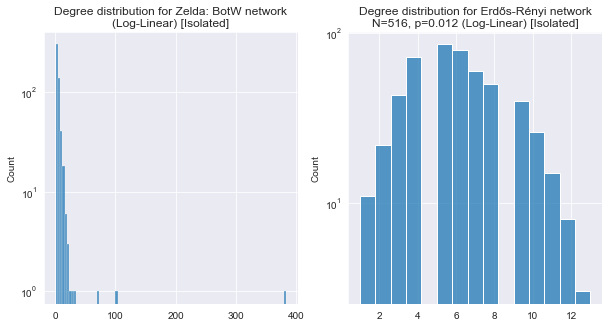

In [46]:
fit = powerlaw.Fit(in_deg, discrete=True)
print("γ for in degree:", fit.power_law.alpha)
fit = powerlaw.Fit(out_deg, discrete=True)
print("γ for out degree:", fit.power_law.alpha)

L = len(GCC.edges)
N = len(GCC.nodes)
p = (2 * (L / N)) / (N - 1)

ERG = nx.generators.random_graphs.erdos_renyi_graph(N, p)
GCC_deg = [deg[1] for deg in GCC.degree() if deg[1] != 0]
ERG_deg = [deg[1] for deg in ERG.degree() if deg[1] != 0]
fig, ax = plt.subplots(1, 2)
sns.histplot(GCC_deg, bins=100, ax=ax[0])
sns.histplot(ERG_deg, bins=15, ax=ax[1])
ax[0].set_yscale("log")
ax[1].set_yscale("log")

ax[0].set_title("Degree distribution for Zelda: BotW network\n(Log-Linear) [Isolated]")
ax[1].set_title(f"Degree distribution for Erdős-Rényi network\nN={N}, p={round(p, 3)} (Log-Linear) [Isolated]")

plt.show()

**Answer:**
- **Find the exponent of the degree distribution (by using the powerlaw package) for the in- and out-degree distribution. What does it say about our network?**

    The exponent for the in degree distribution is 2.6
    
    The exponent for the out degree distribution is 7.2
    
    Having an exponent of 2.6 puts the in degreee section of the network in the scale-free network category.
    
    An exponent of 7.2 however puts the out degree section of the network firmly on the random network side of things.
    
    This shows that the distance between nodes is much lower when looking at the in degree as opposed to looking at the out degree, which more resembles a random network. It also shows that any hubs found in the network will be occuring on the incoming edges side, as hubs do not naturally occur in a random network.
    
- **Compare the degree distribution of the undirected graph to a random network with the same number of nodes and probability of connection p. Comment your results.**

    It is clear to see, in the above plot, that there is a vast difference between the two distributions. The degree distribution for the Zelda character network closely resembles that of the in degree in the previous plot, whereas the degree distribution of the random network is shaped like the bell curve. It is interesting to see how the quite randomly distributed out degree would have been hidden, had one just looked at the overall degree for the Zelda character network.

In [44]:
from fa2 import ForceAtlas2

In [163]:
def edge_role_lookup(A,  B, role_lookup):
    Arole = role_lookup[A]
    Brole = role_lookup[B]
    if Arole == Brole:
        if Arole == "Ally":
            return "skyblue"
        else:
            return "pink"
    else:
        return "purple"
    
GCC_ = GCC.to_undirected()
edge_list = list(GCC_.edges)
role_lookup = nx.get_node_attributes(GCC_, "role")

    
edge_colors = [edge_role_lookup(nodeA, nodeB, role_lookup) for (nodeA, nodeB) in edge_list]
color_map = {
    "Ally": "green",
    "Enemy": "red",
    "Boss": "orange"
}
role_list = [node[1]["role"] for node in list(GCC_.nodes.data())]
color_values = [color_map[role] for role in role_list]

#size_list = [node[1]["word_count"] for node in list(undirected_largest_cc.nodes.data())]
#size_list = [(x/max(size_list))*300 for x in size_list]
size_list = [node[1] * 3 for node in list(GCC_.degree)]


In [164]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        #adjustSizes=False,
                        # edgeWeightInfluence=1.5,
    
                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=0.3,

                        # Tuning
                        scalingRatio=1.5,
                        strongGravityMode=False,
                        gravity=0.7,

                        # Log
                        verbose=True)

In [165]:
positions = forceatlas2.forceatlas2_networkx_layout(GCC_, pos=None, iterations=5000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:25<00:00, 58.58it/s]

BarnesHut Approximation  took  4.82  seconds
Repulsion forces  took  78.47  seconds
Gravitational forces  took  0.22  seconds
Attraction forces  took  0.11  seconds
AdjustSpeedAndApplyForces step  took  0.77  seconds


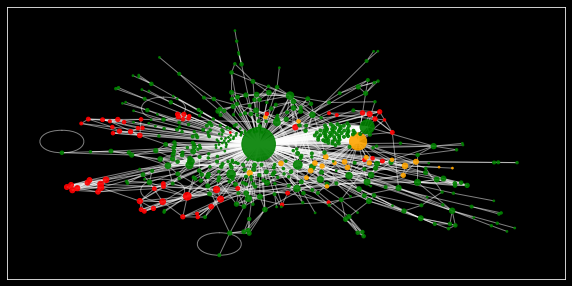

In [175]:

nx.draw_networkx_nodes(GCC_, pos=positions, node_color=color_values,
                     node_size=size_list, alpha=0.9)
nx.draw_networkx_edges(GCC_, pos=positions, alpha=0.5, edge_color="white")

plt.style.use('dark_background')

**Answer:**

* **Create a nice visualization of the total (undirected) network (see above)**:
    
    Node colored according to role.
    
 * "Ally" colored "green",
 * "Enemy" colored "red",
 * "Boss" colored "orange"  
    
  Node size according to degree
    
  Node position based on the Force Atlas 2 algorithm
    
  Dark background for better visal clarity
    
  0.5 Alpha for edges for better visual clarity
    
* **Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?**
    
    The large green node in the middle is highly likely "Link"
    
    You can see clumbs of green nodes, for example to the right of "Link". This group of nodes could likely be a town in the game or faction of some sort.
    
    It can also be seen that the enemy nodes, colored red, are often found in smaller groups that are only linked between each other. This could be due to the fact that enemies are likely found in just one area of the game around other enemies also found in just that area.
    
    Lastly there is a large boss node (orange) to the right of "Link". This is by far the largest of the boss nodes. This could likely be end boss of the game or some other boss with big ties to the games story and characters.

# Part 2: Word-clouds

Create your own version of the word-clouds (from lecture 7). For this exercise we assume you know how to download and clean text from the ZeldaWiki pages.

Here's what you need to do:
> * Create a word-cloud for each race of the [five champions of Hyrule](https://zelda.fandom.com/wiki/Champions) (i.e. Hylian, Zora, Goron, Gerudo, and Rito) according to either TC-IDF. Feel free to make it as fancy as you like. Explain your process and comment on your results.

# Part 3: Communities and TF-IDF

Find communities and compute their associated TF-IDF (from lecture 7 and 8).

Here's what you need to do:
> * Explain the Louvain algorithm and how it finds communities in a newtork.
> * Explain how you chose to identify the communities: Which algorithm did you use? (if you did not use the Louvain method, explain how the method you have used works) 
> * Comment your results:
>   * How many communities did you find in total?
>   * Compute the value of modularity with the partition created by the algorithm.
>   * Plot the distribution of community sizes.
> * For the 5 largest communities, create TF-IDF based rankings of words in each community. 
>   * There are many ways to calculate TF-IDF, explain how you've done it and motivate your choices.
>   * List the 5 top words for each community according to TF.
>   * List the 5 top words for each community accourding to TF-IDF. Are these words more descriptive of the community than just the TF? Justify your answer.

# Part 4: Sentiment of communities

Analyze the sentiment of the communities (lecture 8). Here, we assume that you've successfully identified communities.  More tips & tricks can be found, if you take a look at Lecture 8's exercises.

A couple of additional instructions you will need below:
* We name each community by its three most connected characters.
* Average the average sentiment of the nodes in each community to find a community level sentiment.

Here's what you need to do (repeat these steps and report your results for **both LabMT and VADER**):
> * Calculate and store sentiment for every character
> * Create a histogram of all character's associated sentiments.
> * What are the 10 characters with happiest and saddest pages?

Now, compute the sentiment of communities: 
> * What are the three happiest communities according to the LabMT wordlist approach? What about VADER?
> * What are the three saddest communities according to the LabMT wordlist approach? What about VADER?
> * Create a bar plot showing the average sentiment of each community and add error-bars using the standard deviation for both methods. 
> * Explain the difference between the two methods and compare the results you have obtained above.
> * What is the advantage of using a rule-based method over the dictionary-based approach? 